In [1]:
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt
from pymatgen.analysis.defects.ccd import HarmonicDefect, SRHCapture

In [2]:
TEST_FILES = Path("../../../tests/test_files/v_Ga/")

In [3]:
dirs01 = [TEST_FILES / "ccd_0_-1" / str(i) for i in [0, 1, 2]]
hd0 = HarmonicDefect.from_directories(
    directories=dirs01,
    store_bandstructure=True,
)
print(f"The relaxed structure is in dirs01[{hd0.relaxed_index}]")
print(hd0)
print(
    f"The spin channel ({hd0.spin}) is also automaticalliy determined by the "
    "IPR, by taking the spin channel with the lowest average IPR."
)

/opt/hostedtoolcache/Python/3.10.9/x64/lib/python3.10/site-packages/pymatgen/io/vasp/inputs.py:1820: UnknownPotcarWarning: POTCAR with symbol Ga_d has metadata that does not match                          any VASP POTCAR known to pymatgen. The data in this                          POTCAR is known to match the following functionals:                          ['unvie_PBE_52', 'PBE_54', 'PBE_52']
  warnings.warn(
/opt/hostedtoolcache/Python/3.10.9/x64/lib/python3.10/site-packages/pymatgen/io/vasp/inputs.py:1820: UnknownPotcarWarning: POTCAR with symbol N has metadata that does not match                          any VASP POTCAR known to pymatgen. The data in this                          POTCAR is known to match the following functionals:                          ['unvie_PBE_52', 'PBE_54', 'PBE_52']
  warnings.warn(


The relaxed structure is in dirs01[1]
HarmonicDefect(omega=0.505 eV, charge=0.0, relaxed_index=1, spin=1, defect_band=[(138, 0, 1), (138, 1, 1)])
The spin channel (-1) is also automaticalliy determined by the IPR, by taking the spin channel with the lowest average IPR.


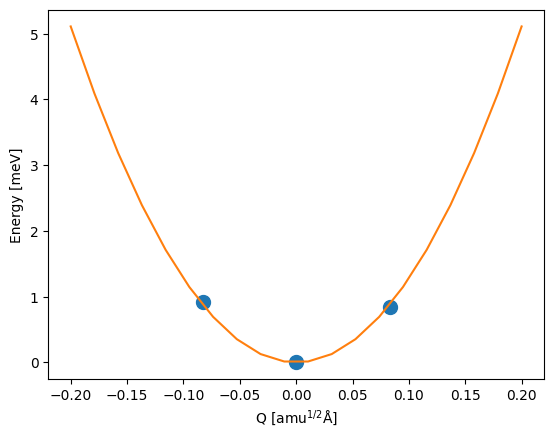

In [4]:
plt.plot(
    hd0.distortions,
    (np.array(hd0.energies) - hd0.energies[hd0.relaxed_index]) * 1000,
    "o",
    ms=10,
)
xx = np.linspace(-0.2, 0.2, 20)
yy = 0.5 * hd0.omega**2 * xx**2
plt.plot(xx, yy * 1000)
plt.xlabel("Q [amu$^{1/2}$Å]")
plt.ylabel("Energy [meV]");

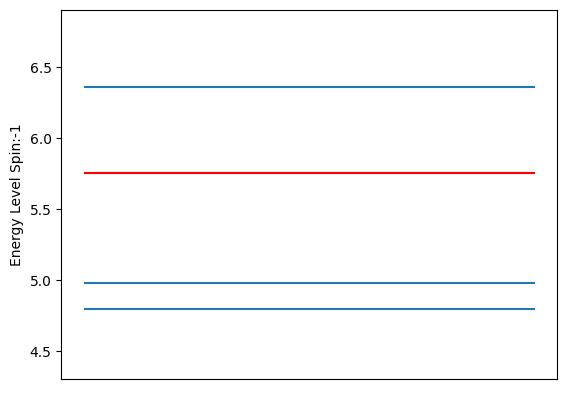

In [5]:
bs = hd0.relaxed_bandstructure
eigs = bs.bands[hd0.spin][:, 1]
eigs_ref_efermi = eigs
plt.hlines([eigs_ref_efermi], 0, 1)
plt.hlines(eigs_ref_efermi[hd0.defect_band_index], 0, 1, colors="red")
plt.ylim(bs.efermi - 0.1, bs.efermi + 2.5)
plt.xticks([])
plt.ylabel(f"Energy Level Spin:{hd0.spin}");

In [6]:
srh = SRHCapture.from_directories(
    initial_dirs=[TEST_FILES / "ccd_0_-1" / str(i) for i in [0, 1, 2]],
    final_dirs=[TEST_FILES / "ccd_-1_0" / str(i) for i in [0, 1, 2]],
    wswq_dir=TEST_FILES / "ccd_0_-1" / "wswqs",
    store_bandstructure=True,
)

In [7]:
T = np.linspace(100, 1000, 20)
cc = srh.get_coeff(T, 0.3, kpt_index=1)

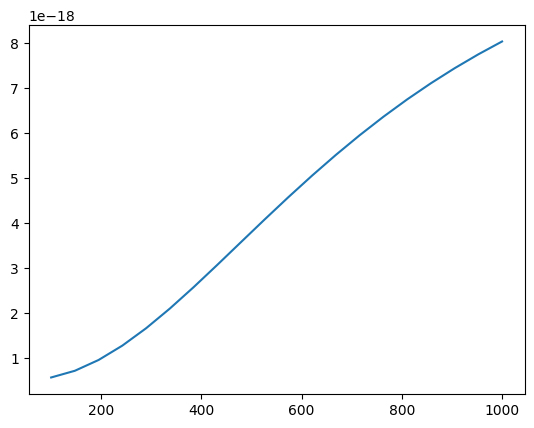

In [8]:
plt.plot(T, cc)